               Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)  \
0                 1515                       6342   

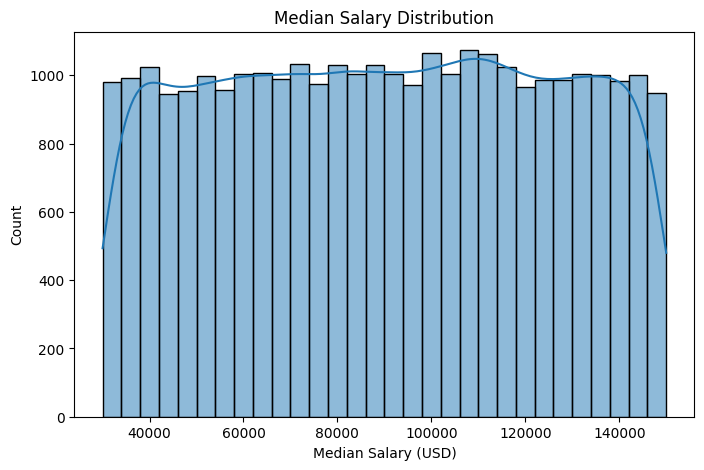

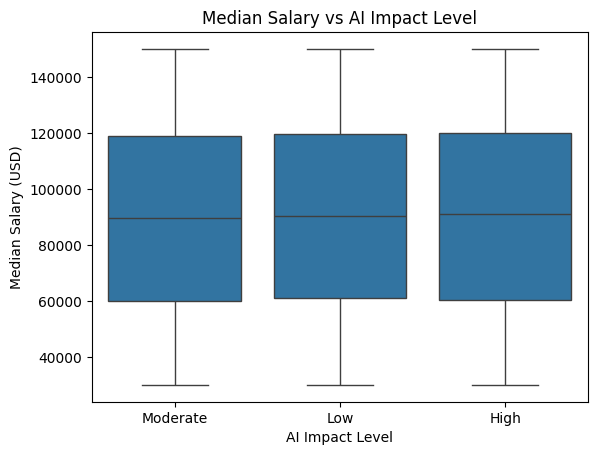

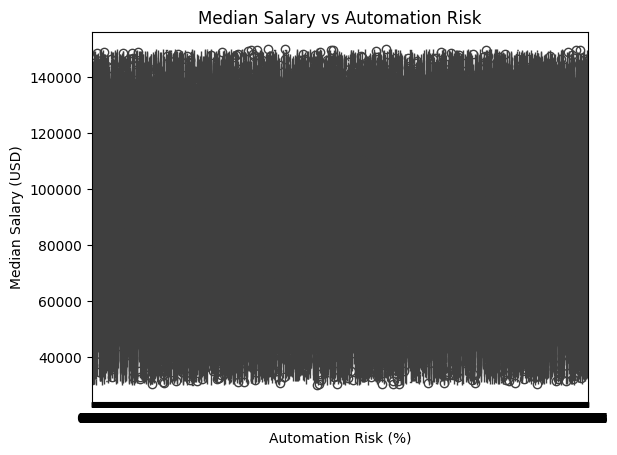

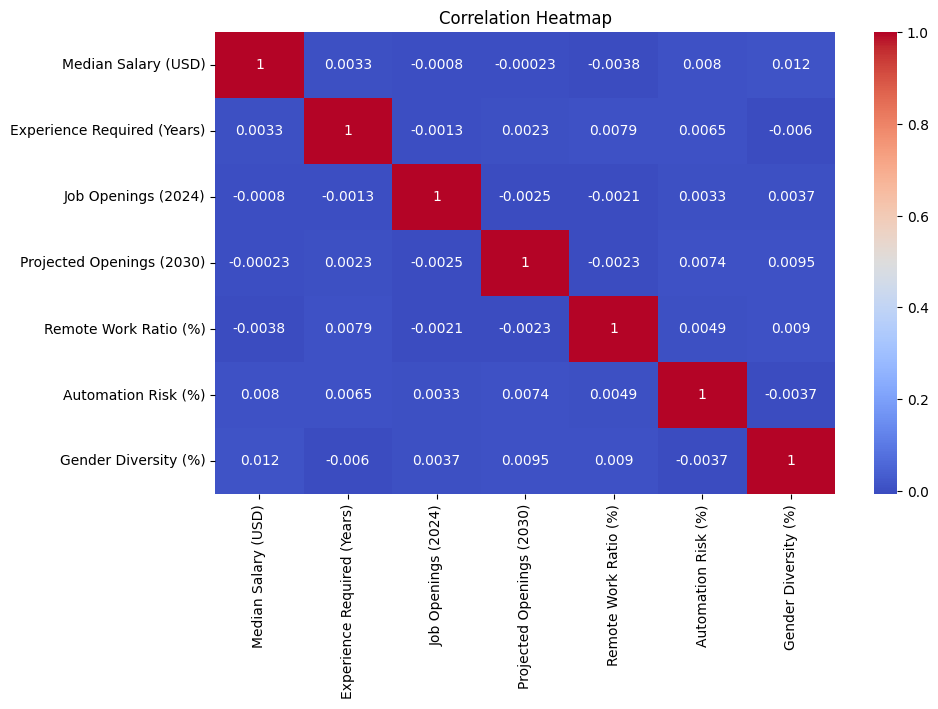

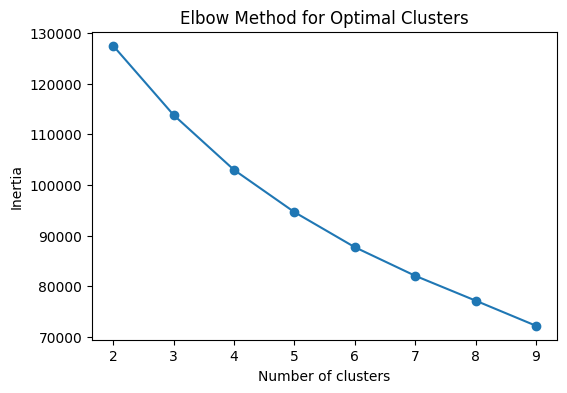

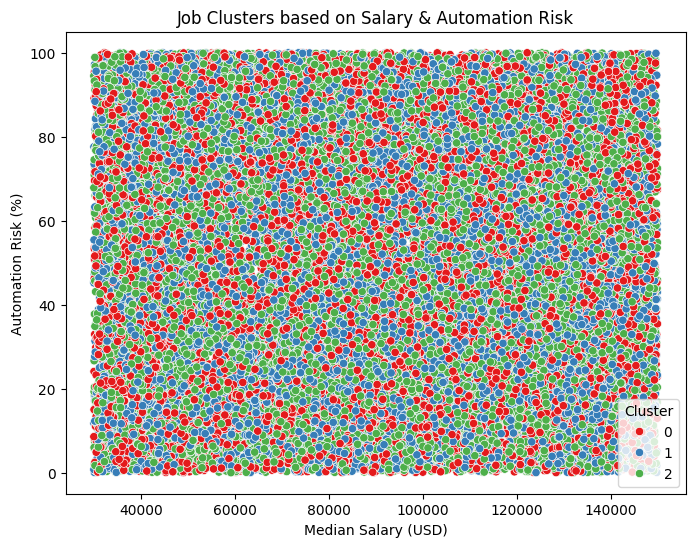


Top 10 High-Opportunity Jobs:
                        Job Title        Industry  Median Salary (USD)  \
9523             Marine scientist          Retail            149848.37   
22104  Sports development officer       Education            132097.22   
28239         Clinical biochemist              IT            131713.79   
18462    Secondary school teacher      Healthcare            135120.62   
27288      Special effects artist       Education            144630.44   
17496       Insurance underwriter  Transportation            128401.39   
2924                  Firefighter       Education            137889.81   
29234               Art therapist              IT            124137.96   
13530             Ophthalmologist      Healthcare            141684.92   
24923              Futures trader              IT            130806.07   

       Automation Risk (%)  Opportunity_Score  
9523                  0.07      140045.205607  
22104                 0.00      132097.220000  
28239     

In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.cluster import KMeans
from scipy.stats import spearmanr, chi2_contingency


df = pd.read_csv("/Users/sakshibhardwaj/Desktop/ai_job_trends_dataset.csv")

# Basic info
print(df.head())
print(df.info())
print(df.describe(include="all"))
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())


# Categorical column value counts
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

# Histograms & Boxplots
plt.figure(figsize=(8,5))
sns.histplot(df['Median Salary (USD)'], kde=True, bins=30)
plt.title("Median Salary Distribution")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Count")
plt.show()

sns.boxplot(data=df, x="AI Impact Level", y="Median Salary (USD)")
plt.title("Median Salary vs AI Impact Level")
plt.show()

sns.boxplot(data=df, x="Automation Risk (%)", y="Median Salary (USD)")
plt.title("Median Salary vs Automation Risk")
plt.show()

# Correlation heatmap for numeric features
numeric_cols = ['Median Salary (USD)', 'Experience Required (Years)', 'Job Openings (2024)',
                'Projected Openings (2030)', 'Remote Work Ratio (%)', 'Automation Risk (%)',
                'Gender Diversity (%)']
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


le = LabelEncoder()
df['AI_Impact_Num'] = le.fit_transform(df['AI Impact Level'])
df['Job_Status_Num'] = le.fit_transform(df['Job Status'])
df['Industry_Num'] = le.fit_transform(df['Industry'])

# Fill missing numeric values
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Select features for clustering
cluster_features = ['Median Salary (USD)', 'Experience Required (Years)',
                    'Automation Risk (%)', 'Remote Work Ratio (%)', 'Gender Diversity (%)']
X = df[cluster_features].copy()
X_scaled = StandardScaler().fit_transform(X)

# Determine optimal clusters using Elbow method
inertia = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Apply KMeans
k = 3  # set based on elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Median Salary (USD)', y='Automation Risk (%)', hue='Cluster', palette='Set1')
plt.title("Job Clusters based on Salary & Automation Risk")
plt.show()


# OPPORTUNITY SCORING

df['Opportunity_Score'] = df['Median Salary (USD)'] / (df['Automation Risk (%)'] + 1)
df_sorted = df.sort_values(by='Opportunity_Score', ascending=False)
print("\nTop 10 High-Opportunity Jobs:")
print(df_sorted[['Job Title', 'Industry', 'Median Salary (USD)', 'Automation Risk (%)', 'Opportunity_Score']].head(10))


#OPTIONAL: Statistical Analysis

# Spearman correlation
mapping = {"Low": 1, "Medium": 2, "High": 3}
df["AI_Num"] = df["AI Impact Level"].map(mapping)
corr, pval = spearmanr(df["AI_Num"], df["Median Salary (USD)"], nan_policy='omit')
print(f"\nSpearman correlation between AI Impact Level and Median Salary: {corr:.2f}, p-value={pval:.4f}")

# Chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df["AI Impact Level"], df["Projected Openings (2030)"]))
print(f"\nChi-Square between AI Impact Level and Projected Openings: chi2={chi2:.2f}, p={p:.4f}")


=== Linear Regression ===
R2 Score: -0.0003686195795999936
RMSE: 34436.50721813188

=== Random Forest Regression ===
R2 Score: -0.05319907921021172
RMSE: 35334.12176640941


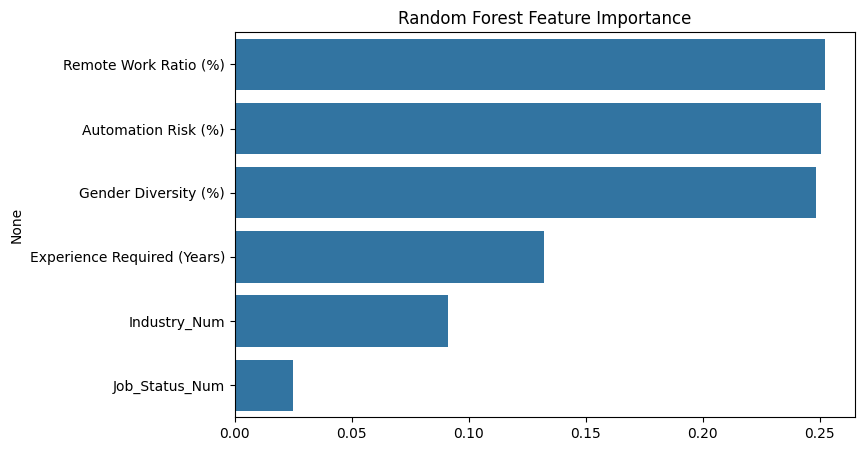

In [18]:
# ==============================
# 8️⃣ MACHINE LEARNING PREDICTION
# ==============================
# Target: Median Salary (USD)
y = df['Median Salary (USD)']
X = df[['Experience Required (Years)', 'Automation Risk (%)', 'Remote Work Ratio (%)', 
        'Gender Diversity (%)', 'Job_Status_Num', 'Industry_Num']]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------
# Linear Regression
# ------------------------------
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("=== Linear Regression ===")
print("R2 Score:", r2_score(y_test, y_pred_lr))
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("RMSE:", rmse_lr)

# ------------------------------
# Random Forest Regressor
# ------------------------------
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest Regression ===")
print("R2 Score:", r2_score(y_test, y_pred_rf))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE:", rmse_rf)

# Feature Importance
feat_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title("Random Forest Feature Importance")
plt.show()
